In [4]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft, fftshift
import sounddevice as sd
import scipy.io.wavfile as reader
from scipy import signal

## Spectrogram

#### Read file

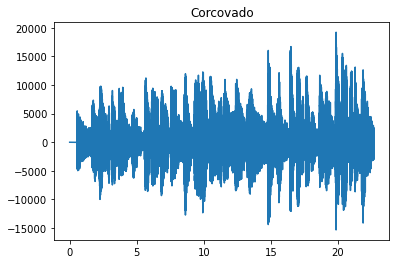

In [5]:
#Read audio file
fs_song, song = reader.read('./Corcovado.wav')

#Take single channel
x_n = song[:,1].astype(np.float64)

#for demonstration purposes the analysis is performed in the first 1000000 samples
x_n = x_n[:1000000]
plot1 = plt.figure(1)

duration = len(x_n)/fs_song
t = np.linspace(0, len(x_n)/fs_song, len(x_n))
plt.plot(t,x_n)
plt.title('Corcovado')

plt.show()
#sd.play(x_n.astype('int16'))

#### FFT

In [6]:
x_fft = np.absolute(np.fft.fft(x_n, len(x_n)))

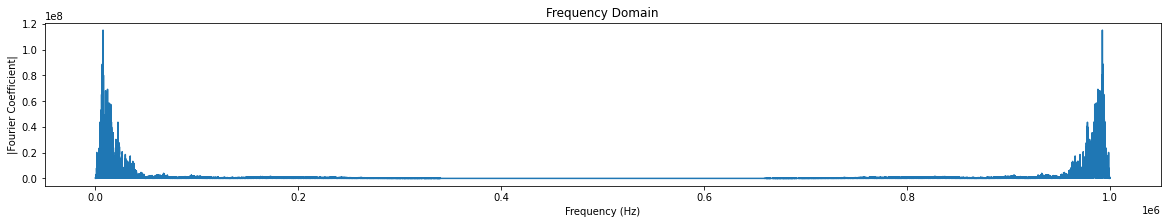

In [7]:
plt.figure(figsize=(20,3))
plt.plot(x_fft)

plt.title("Frequency Domain")
plt.xlabel("Frequency (Hz)")
plt.ylabel("|Fourier Coefficient|")
plt.show()

#### Spectrogram

In [8]:
def spectrogram(x, window, overlap_size):
    
    window_size = len(window)
    
    # all indices where a window starts along the signal
    window_starts = np.arange(0,len(x),window_size-overlap_size,dtype=int)
    
    # remove windows that exceed signal length
    window_starts = window_starts[window_starts + window_size < len(x)]
    
    result = []
    
    for w in window_starts:
        
        # truncate signal 
        windowed_signal = x[w:w + window_size]
        
        # apply triangular window
        windowed_signal = windowed_signal * W_n

        # compute fft of windowed signal
        window_fft = np.absolute(np.fft.fft(windowed_signal))
         
        #Append column
        result.append(window_fft)
    
    #Create spectogram by rehsaping the result array
    spec = np.array(result).T
    
    #Apply log scale for visualization
    spec_log = spec[:int(len(spec)/2)]
    spec_log = 10*np.log10(spec_log)
    
    #Plot log scale spectogram
    plt.figure(figsize=(20,8))
    plt.imshow(spec_log, origin='lower')

    ## create x axis
    x_length = spec_log.shape[1]
    x = np.linspace(0,x_length,10)
    x_label = ["{:4.2f}".format(i) for i in np.linspace(0,duration*window_starts[-1]/len(x_n),10)]
    plt.xticks(x,x_label)
    plt.xlabel("Time (sec)")

    ## create y axis
    y_length = spec_log.shape[0]
    y = np.linspace(0,y_length,10)
    y_label = y*fs_song/y_length/2
    y_label = [int(i) for i in y_label] 
    plt.yticks(y,y_label)
    plt.ylabel("Frequency (Hz)")

    plt.show()
    
    return spec

#### Design parameters

In [9]:
window_size = 1024
overlap = 50

#### Window

Text(0.5, 1.0, 'Triangular window')

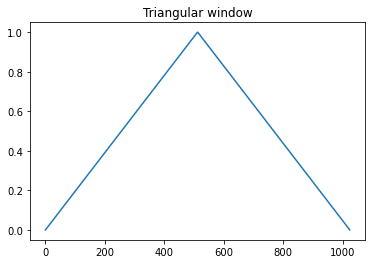

In [10]:
W_n = signal.triang(window_size)
plt.plot(W_n)
plt.title("Triangular window")

#### Get spectrogram

<ipython-input-8-9b238d338e61>:32: RuntimeWarning: divide by zero encountered in log10
  spec_log = 10*np.log10(spec_log)


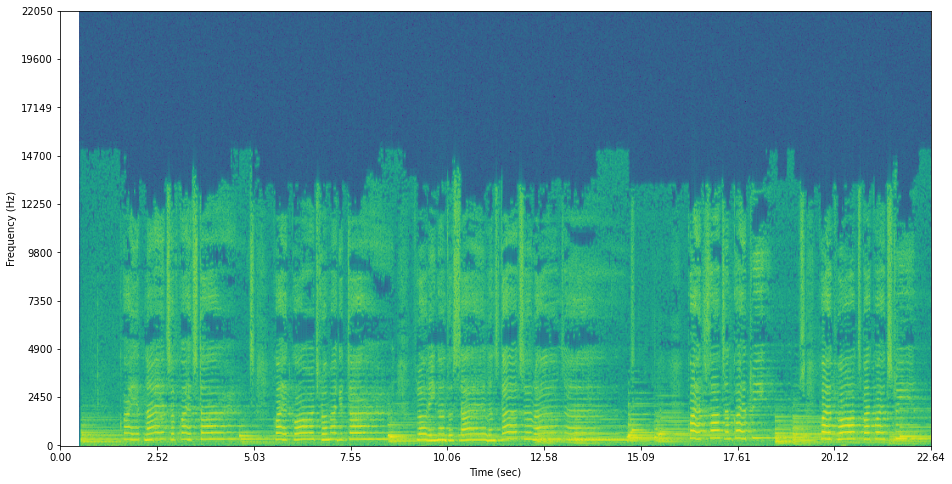

In [11]:
spectrogram = spectrogram(x_n,W_n,overlap)

#### Compare against the libary spectrogram

/opt/anaconda3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:7553: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


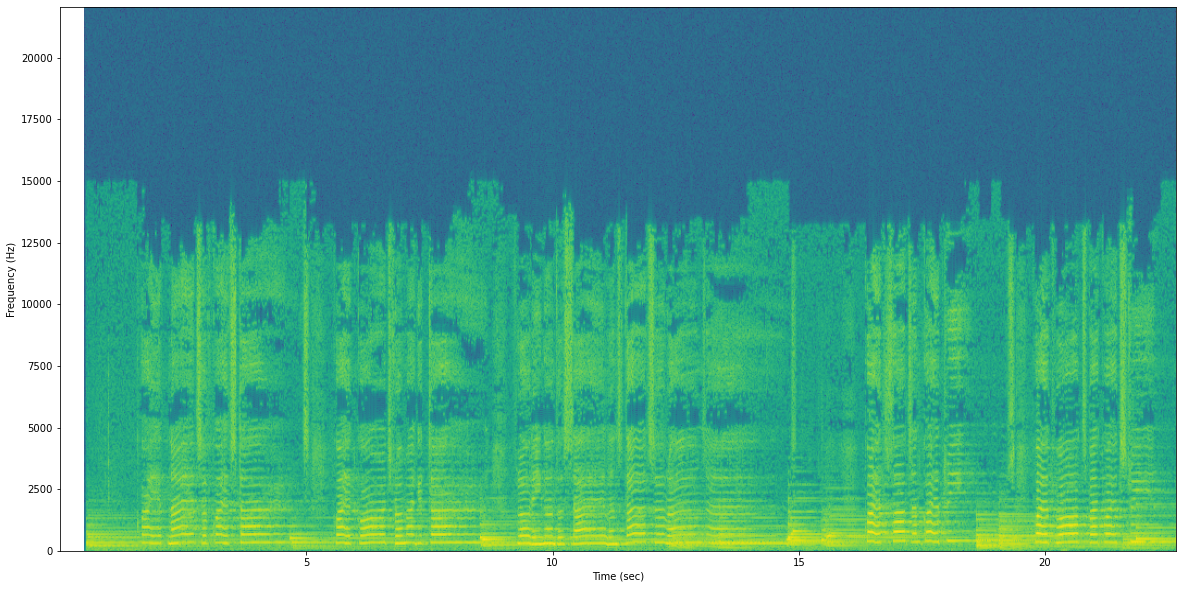

In [12]:
plt.figure(figsize=(20,10))
plt.specgram(x_n, Fs=fs_song, noverlap=overlap, window = W_n, NFFT = window_size)
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.show()